# Homework 2: classification
Data source: http://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np

In [2]:
data = arff.loadarff('4year.arff')
df = pd.DataFrame(data[0])

In [3]:
df['bankruptcy'] = (df['class']==b'1')
del df['class']
df.columns = ['X{0:02d}'.format(k) for k in range(1,65)] + ['bankruptcy']

In [4]:
df.describe()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
count,9791.000000,9791.000000,9791.000000,9749.000000,9.771000e+03,9791.000000,9791.000000,9773.000000,9792.000000,9791.000000,...,9.792000e+03,9771.000000,9791.000000,9776.000000,9791.000000,9178.000000,9760.000000,9.771000e+03,9749.000000,9561.000000
mean,0.043019,0.596404,0.130959,8.136600,6.465164e+01,-0.059273,0.059446,19.884016,1.882296,0.389040,...,7.686330e+03,-0.992263,0.035022,1.133287,0.856053,118.156064,25.194430,2.015157e+03,8.660813,35.949619
std,0.359321,4.587122,4.559074,290.647281,1.475939e+04,6.812754,0.533344,698.697015,17.674650,4.590299,...,7.605261e+04,77.007971,8.945365,8.038201,26.393305,3230.316692,1099.260821,1.171461e+05,60.838202,483.318623
min,-12.458000,0.000000,-445.910000,-0.045319,-3.794600e+05,-486.820000,-12.458000,-1.848200,-0.032371,-445.910000,...,-7.132200e+05,-7522.100000,-597.420000,-30.892000,-284.380000,0.000000,-12.656000,-1.496500e+04,-0.024390,-0.000015
25%,0.001321,0.263145,0.020377,1.047000,-5.121700e+01,-0.000578,0.003004,0.428300,1.006675,0.294440,...,2.184000e+01,0.003121,0.008768,0.885722,0.000000,5.356325,4.267700,4.323400e+01,2.938800,2.012900
50%,0.041364,0.467740,0.199290,1.591800,-5.557600e-02,0.000000,0.048820,1.088700,1.161300,0.510450,...,9.503300e+02,0.043679,0.098026,0.958305,0.002129,9.482000,6.283550,7.472900e+01,4.848900,4.041600
75%,0.111130,0.689255,0.410670,2.880400,5.573200e+01,0.065322,0.126940,2.691000,1.970225,0.714290,...,4.694550e+03,0.117170,0.242680,0.996163,0.211790,19.506000,9.938200,1.233450e+02,8.363800,9.413500
max,20.482000,446.910000,22.769000,27146.000000,1.034100e+06,322.200000,38.618000,53209.000000,1704.800000,12.602000,...,6.123700e+06,112.020000,226.760000,668.750000,1661.000000,251570.000000,108000.000000,1.077900e+07,5662.400000,21153.000000


In [5]:
sum(df.bankruptcy == True)

515

正负样本差异太大，需要进行重新采样平衡数据集

In [6]:
from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import Imputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imp = imp_mean.fit_transform(df.values)

In [7]:
from imblearn.over_sampling import RandomOverSampler
X, y = X_imp[:, :-1], X_imp[:, -1]
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X, y)

In [8]:
from sklearn.model_selection import train_test_split

X, y = X_resampled, y_resampled

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [9]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## Find the 2 most important features
using Logistic Regression with L1 penalty

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
# and put more...

In [15]:
lr = LogisticRegression(penalty='l1', C=0.005, max_iter=100,solver='liblinear')#L1正则化只能用liblinear,因为L1有不可导的点
lr.fit(X_train_std, y_train)
lr.coef_[lr.coef_!=0]

array([-0.02756466, -0.00445011,  0.00556012, -0.02336762, -0.08653515,
       -0.66756056, -0.00223814,  0.36883006, -0.03107085])

In [16]:
a = 0
i = 0
while a != 2:
    i = 0.001 + i #C要尽可能小，让更多注意力放在惩罚项上面，才能使得特征数目少
    if i == 10:
        print('not find')
        break
    lr = LogisticRegression(penalty='l1', C=i, max_iter=100,solver='liblinear')#L1正则化只能用liblinear,因为L1有不可导的点
    lr.fit(X_train_std, y_train)
    a = lr.coef_[lr.coef_!=0].shape[0]# check the number of the features with non-zero weights

In [17]:
lr.coef_[lr.coef_!=0].shape# check the number of the features with non-zero weights

(2,)

In [18]:
# redefine X_train_std and X_test_std
X_train_std = X_train_std[:, lr.coef_[0]!=0]
X_test_std = X_test_std[:, lr.coef_[0]!=0]

## Apply LR / SVM / Decision Tree below

In [37]:
## LR
lr = LogisticRegression(solver='liblinear')
parameters={'penalty':['l1','l2'],
            'C':[0.05,0.1,0.15],
            }
grid_search=GridSearchCV(lr,parameters,scoring='accuracy',cv=5)
grid_search.fit(X_train_std, y_train) 
LR = grid_search.best_estimator_
print('best params:'+str(grid_search.best_params_))
print('Training accuracy:', grid_search.score(X_train_std, y_train))
print('Test accuracy:', grid_search.score(X_test_std, y_test))

best params:{'C': 0.1, 'penalty': 'l1'}
Training accuracy: 0.6625086625086625
Test accuracy: 0.6579845518232441


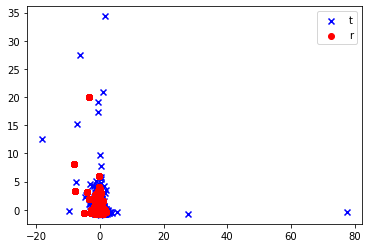

In [23]:
## SVM 
#first observe the distribution of data
plt.scatter(X_train_std[y_train == False,0],X_train_std[y_train == False,1],c='b',marker='x',label='1')
plt.scatter(X_train_std[y_train == True,0],X_train_std[y_train == True,1],c='r',marker='o',label='-1')
plt.legend('train set')
plt.show()

In [38]:
## SVM 
svm = SVC()
# parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                      'C': [1, 10, 100, 1000]},
#                     {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
parameters = {'kernel': ['rbf'], 'gamma': [1,100,500,1000],
                     'C': [10]}                 
grid_search=GridSearchCV(svm,parameters,scoring='accuracy',cv=5)
grid_search.fit(X_train_std, y_train)
SVM = grid_search.best_estimator_
print('best params:'+str(grid_search.best_params_))
print('Training accuracy:', grid_search.score(X_train_std, y_train))
print('Test accuracy:', grid_search.score(X_test_std, y_test))

best params:{'C': 10, 'gamma': 1000, 'kernel': 'rbf'}
Training accuracy: 0.9391699391699392
Test accuracy: 0.9139572480689779


In [34]:
## Decision Tree，并不是深度等于特征个数，其实最大的深度是样本的个数,这个肯定是层数越多准确率越高
tree = DecisionTreeClassifier()
parameters = {
    'criterion':['gini','entropy'],
    'max_depth': [1,2,3,4,5,8,10]
                }                 
grid_search=GridSearchCV(tree,parameters,scoring='accuracy',cv=5)
grid_search.fit(X_train_std, y_train)
TREE = grid_search.best_estimator_
print('best params'+str(grid_search.best_params_))
print('Training accuracy:', grid_search.score(X_train_std, y_train))
print('Test accuracy:', grid_search.score(X_test_std, y_test))

best params{'criterion': 'gini', 'max_depth': 10}
Training accuracy: 0.8355278355278355
Test accuracy: 0.8079755703251302


## Visualize the classification

In [20]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [21]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


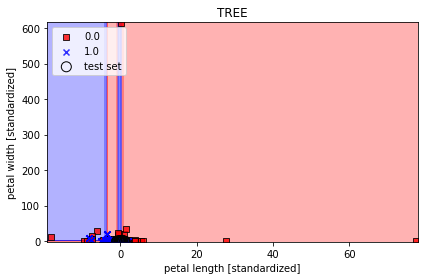

In [35]:
#TREE
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=TREE, test_idx=range(0, 50), resolution=1)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.title('TREE')
plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


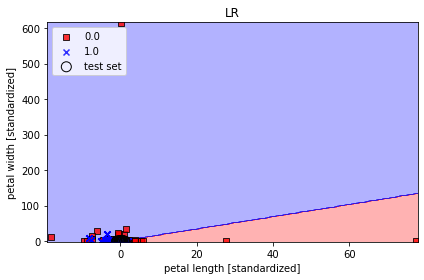

In [40]:
#LR
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=LR, test_idx=range(0, 50), resolution=1)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.title('LR')
plt.tight_layout()
plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


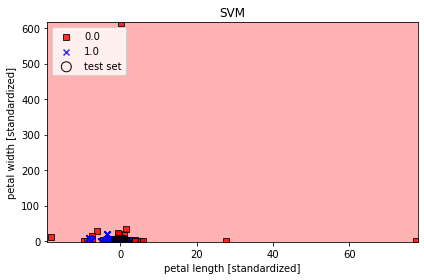

In [39]:
#SVM
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=SVM, test_idx=range(0, 50), resolution=1)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.title('SVM')
plt.tight_layout()
plt.show()